In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [3]:
# Load the customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
# First look at its main features (head, shape, info).
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [5]:
# Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [6]:
# Change the type of effective_to_date column to DateTime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [7]:
# Check NaN values per column.
display(customer_df.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
# Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
def split_df(df):
    numerical_df = df.select_dtypes(include = np.number)
    categorical_df = df.select_dtypes(include = object)
    return numerical_df, categorical_df
numerical_df, categorical_df = split_df(customer_df)
print(customer_df.shape, numerical_df.shape, categorical_df.shape)

(9134, 24) (9134, 8) (9134, 15)


In [9]:
# Drop any ID column.
customer_df = customer_df.drop(['customer'], axis = 1)

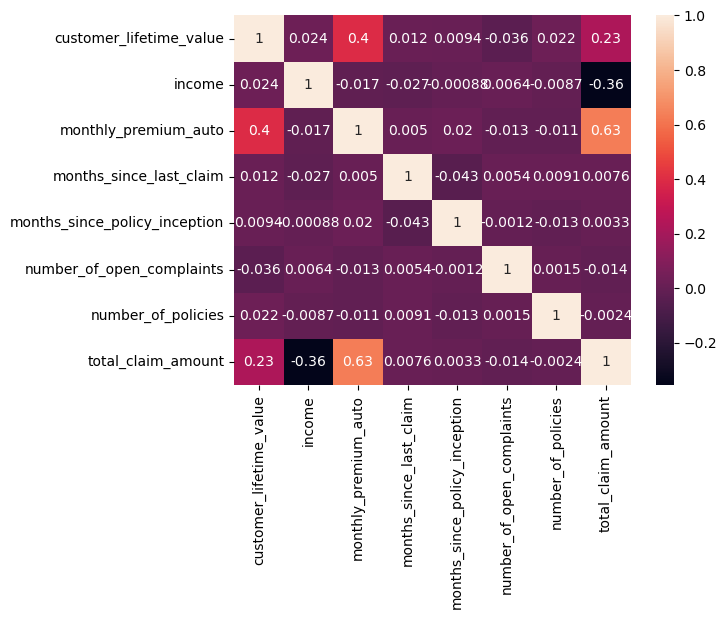

In [10]:
# Get the correlation matrix for the numerical variables. 
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot = True);

In [ ]:
# What is the pair of numerical variables that have the highest correlation? It makes sense, why?
# The pair of numerical variables that have the highest correlation is total_claim_amount and monthly_premium. 
# It makes sense because the higher the monthly premium, the higher the total claim amount.

In [11]:
# Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 
# the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. 
# To this end, it might be helpful to count the number of unique values. 
# The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. 
# Then, use it to create two new dataframes: continuous_df and discrete_df.
def split_df(df, n = 36):
    numerical_df = df.select_dtypes(include = np.number)
    continuous_df = numerical_df.loc[:, numerical_df.nunique() > n]
    discrete_df = numerical_df.loc[:, numerical_df.nunique() <= n]
    return continuous_df, discrete_df

continuous_df, discrete_df = split_df(customer_df)
print(continuous_df.shape, discrete_df.shape)

(9134, 5) (9134, 3)


In [13]:
def sep_dis_con(df, c=36):
    '''function that separates one dataframe into two: 
    one with numerical and another with categorical columns.
    When using this function, you have to store results in 2 variable'''
    con = []
    dis = []
    for col in df:
        if len(df[col].unique()) > c:
            con.append(df[col])
        else:
            dis.append(df[col])
    con = pd.DataFrame(con).T
    dis = pd.DataFrame(dis).T    
    return con, dis

c, d = sep_dis_con(numerical_df)
print(c.shape, d.shape)

(9134, 5) (9134, 3)


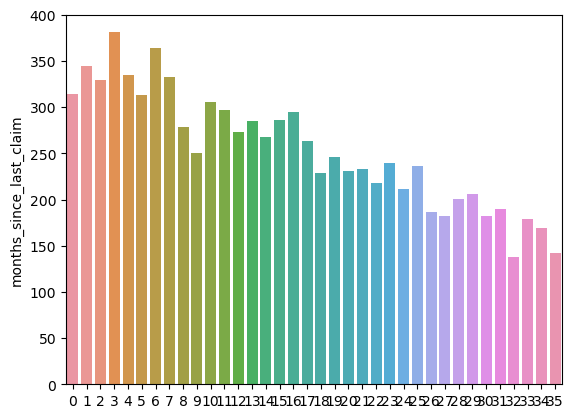

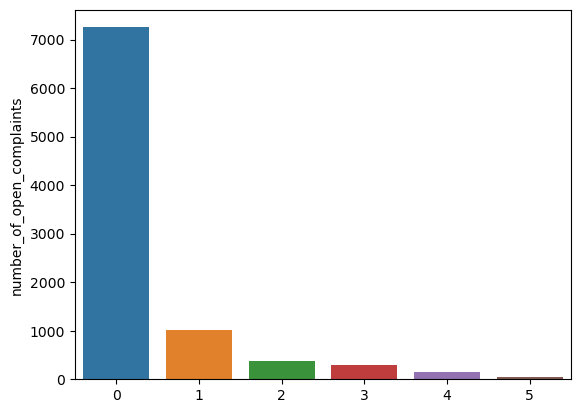

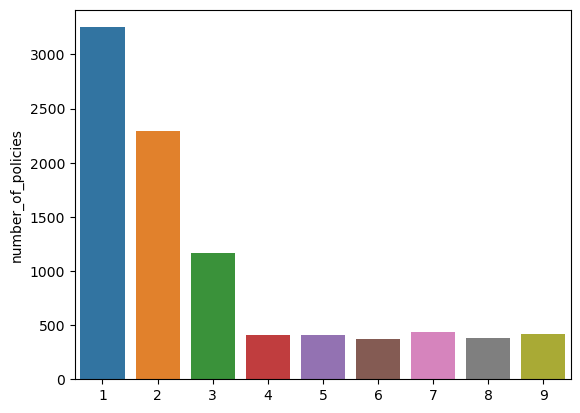

In [18]:
# Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
def barplot(df):
    for col in df:
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        plt.show()
barplot(discrete_df)


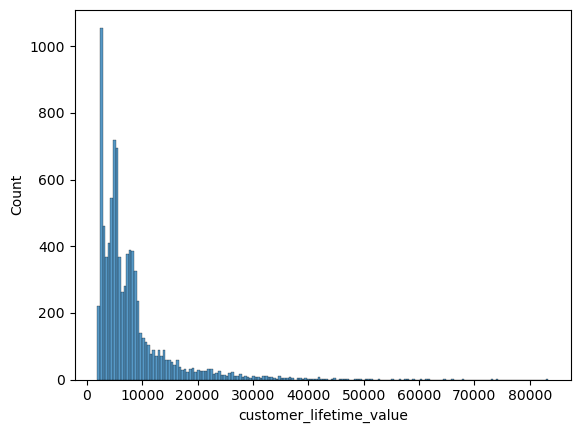

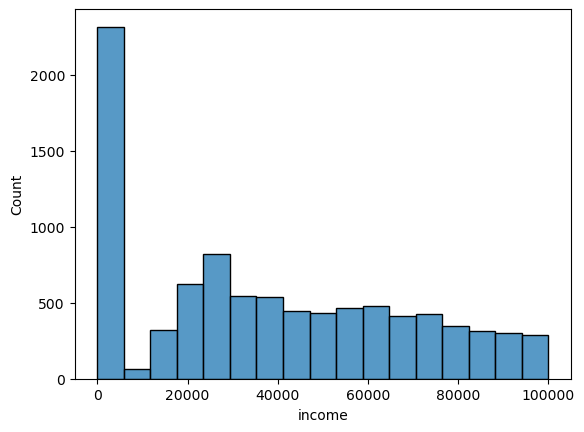

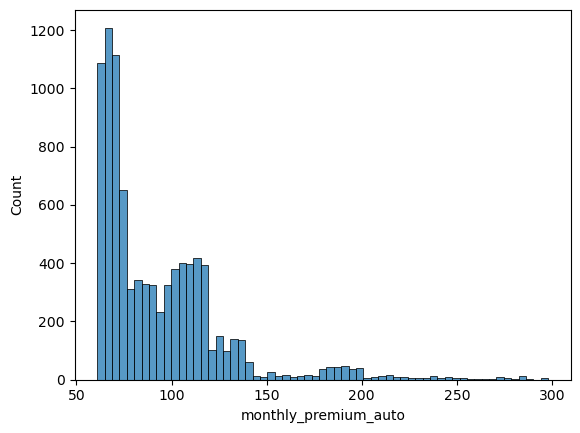

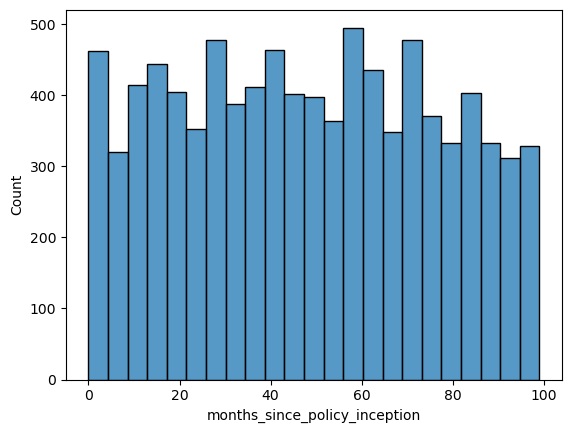

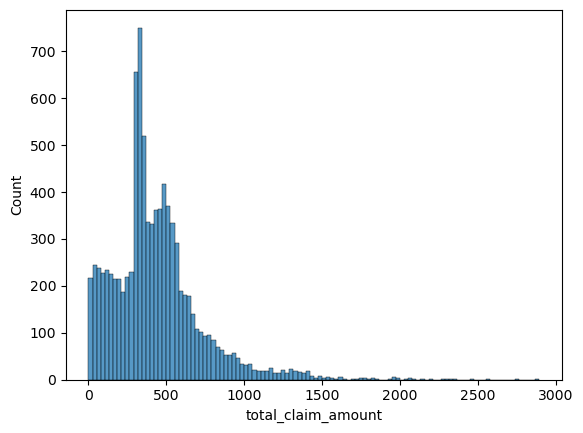

In [19]:
# Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
def histogram(df):
    for col in df:
        sns.histplot(df[col])
        plt.show()
histogram(continuous_df)

In [ ]:
# According to the previous histogram plots, do you think that you will have to apply any transformation?
# The distribution is skewed to the left so applynig a transformation is necessary.

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


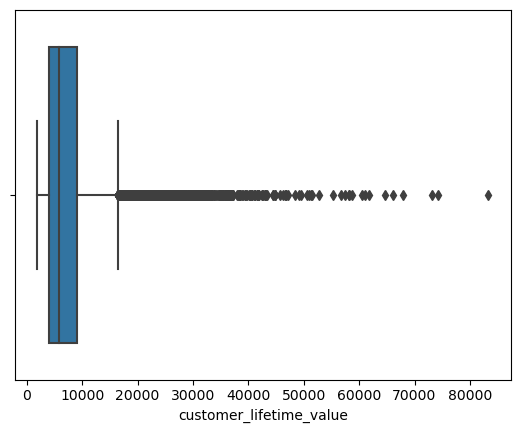

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


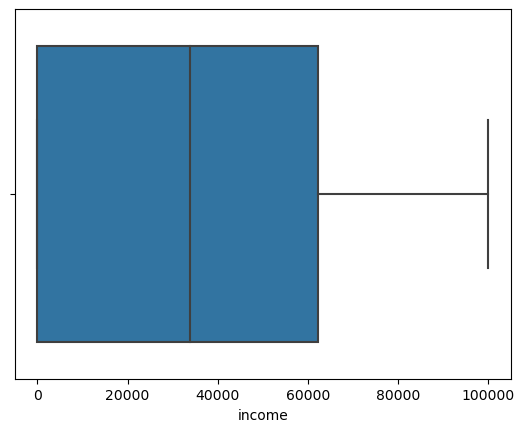

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


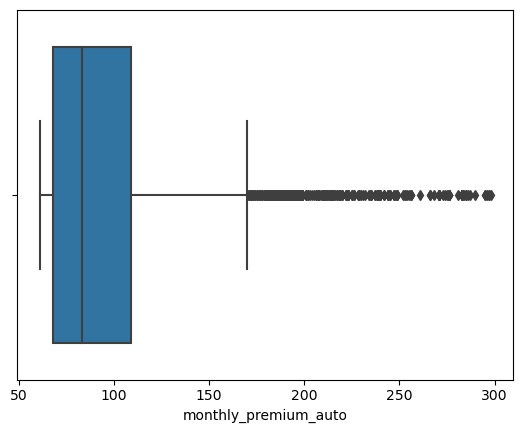

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


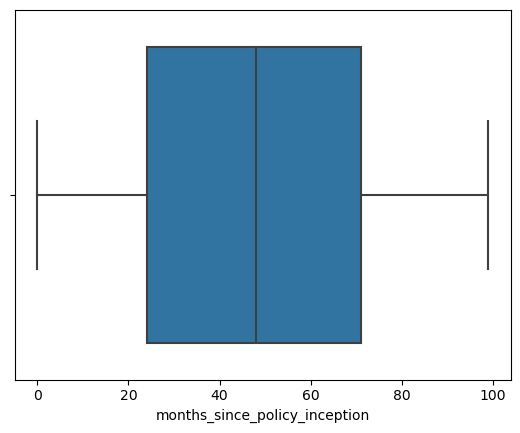

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


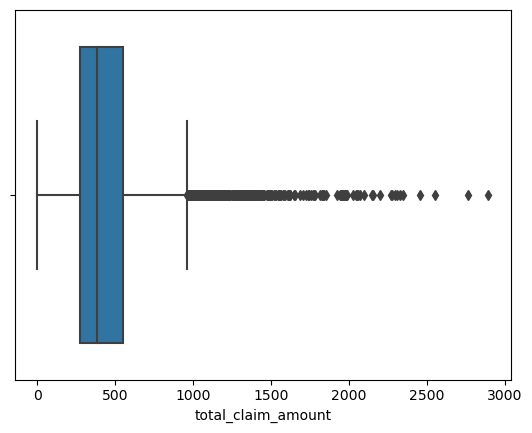

In [21]:
# Look for outliers in the continuous variables that you have found. 
# Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.
def boxplot(df):
    for col in df:
        sns.boxplot(df[col])
        plt.show()
boxplot(continuous_df);

In [ ]:
# There are quite a few outliers in the continuous variables!